In [53]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [54]:
# load dataset
dataframe = pd.read_csv(r"homeLoanAproval_modificado.csv",sep=',')

In [55]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,PropertyArea,LoanStatus
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,Urban,Y


In [56]:
# assuming that 'gender' is the name of the column causing the issue
le = LabelEncoder()
# dataframe['Education'] = le.fit_transform(dataframe['Education'])
# dataframe['Gender'] = le.fit_transform(dataframe['Gender'])
# dataframe['Married'] = le.fit_transform(dataframe['Married'])
# dataframe['SelfEmployed'] = le.fit_transform(dataframe['SelfEmployed'])
# dataframe['PropertyArea'] = le.fit_transform(dataframe['PropertyArea'])

# now you can split your data and fit the model
X = dataframe[['ApplicantIncome', 'CoapplicantIncome', 'Dependents', 'LoanAmount','LoanAmountTerm']].values
y = dataframe['LoanStatus'].values

In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5277777777777778


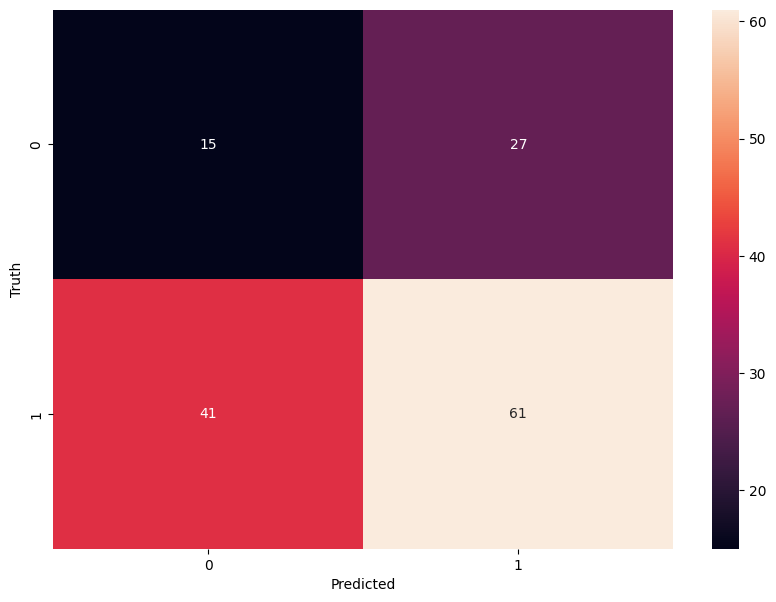

In [60]:
# Mostramos la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

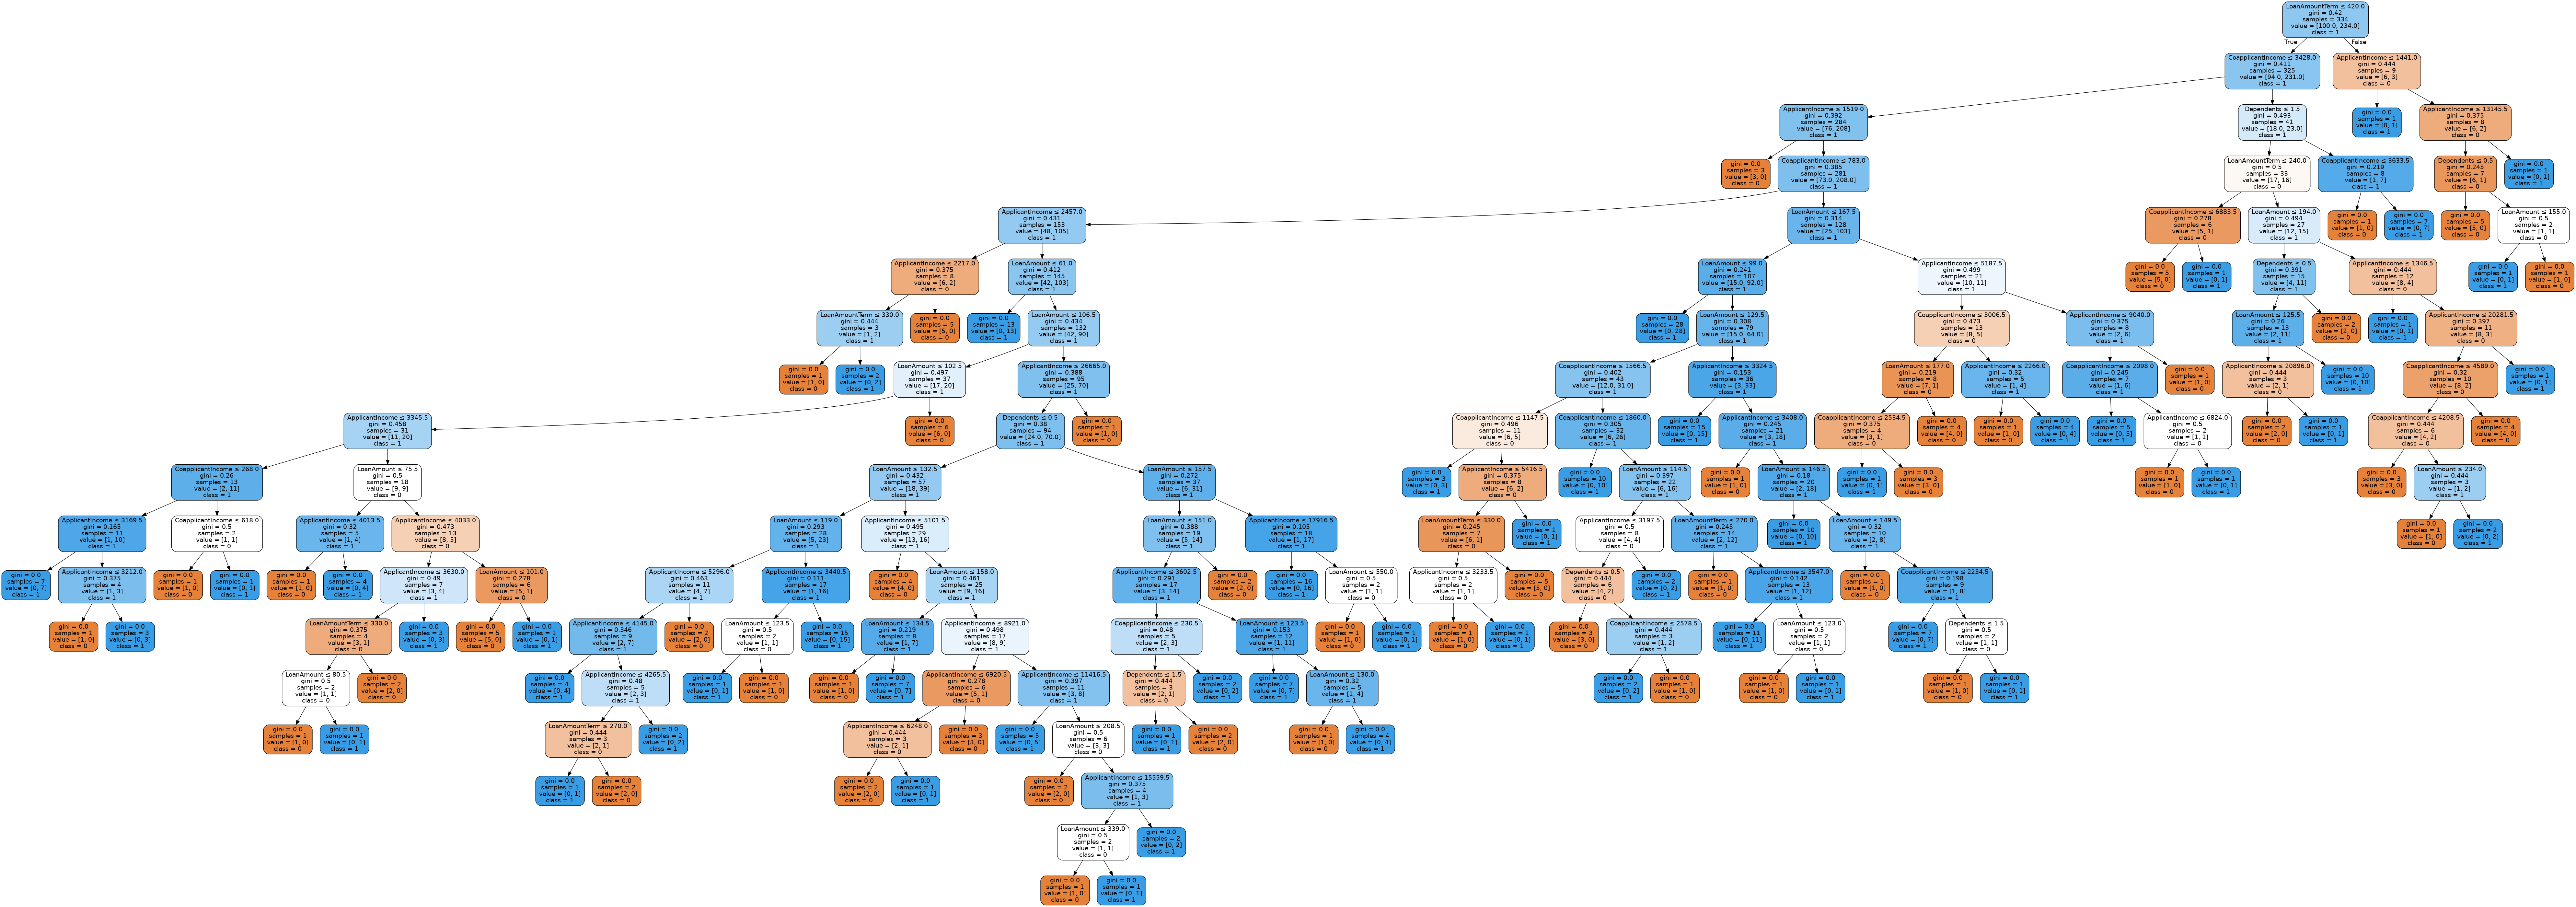

In [61]:
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

feature_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Dependents', 'LoanAmount','LoanAmountTerm']


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol-grande.png')
Image(graph.create_png())


In [62]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


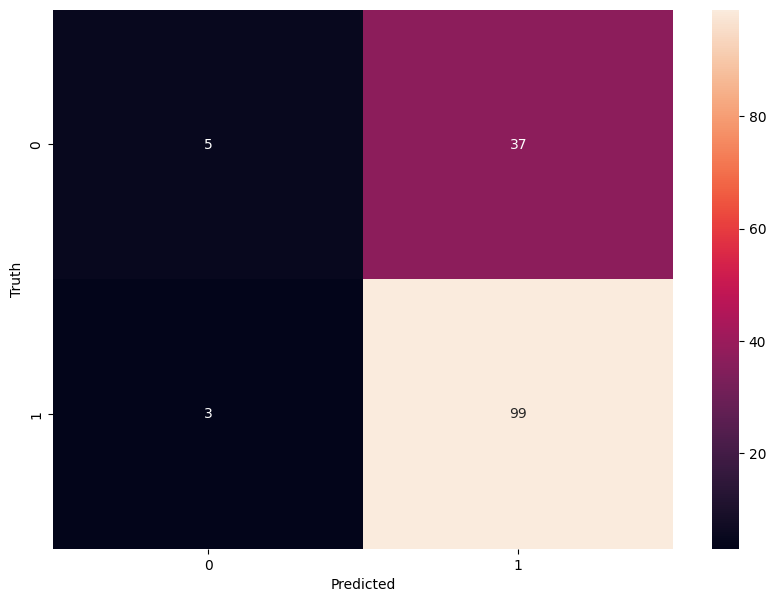

In [63]:
# Mostramos la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

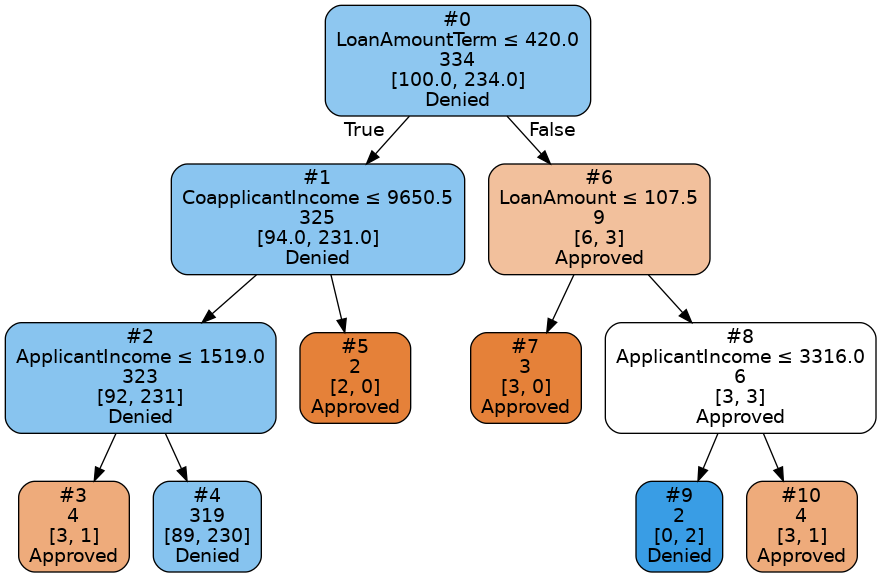

In [67]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

# Modificamos aquí para simplificar
export_graphviz(clf, out_file=dot_data,  
                class_names=['Approved', 'Denied'], # Ajusta los nombres de las clases según tus datos
                feature_names=feature_cols,
                impurity=False, # No mostrar la impureza de cada nodo
                filled=True, # No colorear los nodos por la clase
                rounded=True, # Opcional: para bordes redondeados
                special_characters=True,
                node_ids=True, # Mostrar el ID de cada nodo
                label='none') # Mostrar solo las etiquetas de clase en los nodos hoja

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('simple_tree.png') # Guarda el árbol simplificado
Image(graph.create_png()) # Muestra el árbol simplificado inline si estás en Jupyter